### Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's
launching in Chicago. Your task is to find patterns in the available information.
You want to understand passenger preferences and the impact of external
factors on rides.

You'll study a database, analyze data from competitors, and test a hypothesis
about the impact of weather on ride frequency.

In [1]:
#pandas and seaborn and matplotlib and numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
#import the files
trips_by_company = pd.read_csv("/datasets/project_sql_result_01.csv")
trips_by_company

company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]

In [3]:
dropoff_avg = pd.read_csv("/datasets/project_sql_result_04.csv")
dropoff_avg

dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]

In [4]:
#dropoff_avg.info()

In [5]:
#trips_by_company.info()

In [6]:
#dropoff_avg.describe()

In [7]:
#trips_by_company.describe() 

#### Convert the data to the required types

The number of trips by company should be a whole number. I am making the assumption that the passenger did not exit the taxi in less than one ride. The data type is int64, so that is correct.

The average number of rides is represented by decimal for greater accuracy, which is best expressed as a float64.

#### identify the top 10 neighborhoods in terms of drop-offs

In [8]:
dropoff_avg.head(10)

dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667

## Make graphs

### taxi companies and number of rides

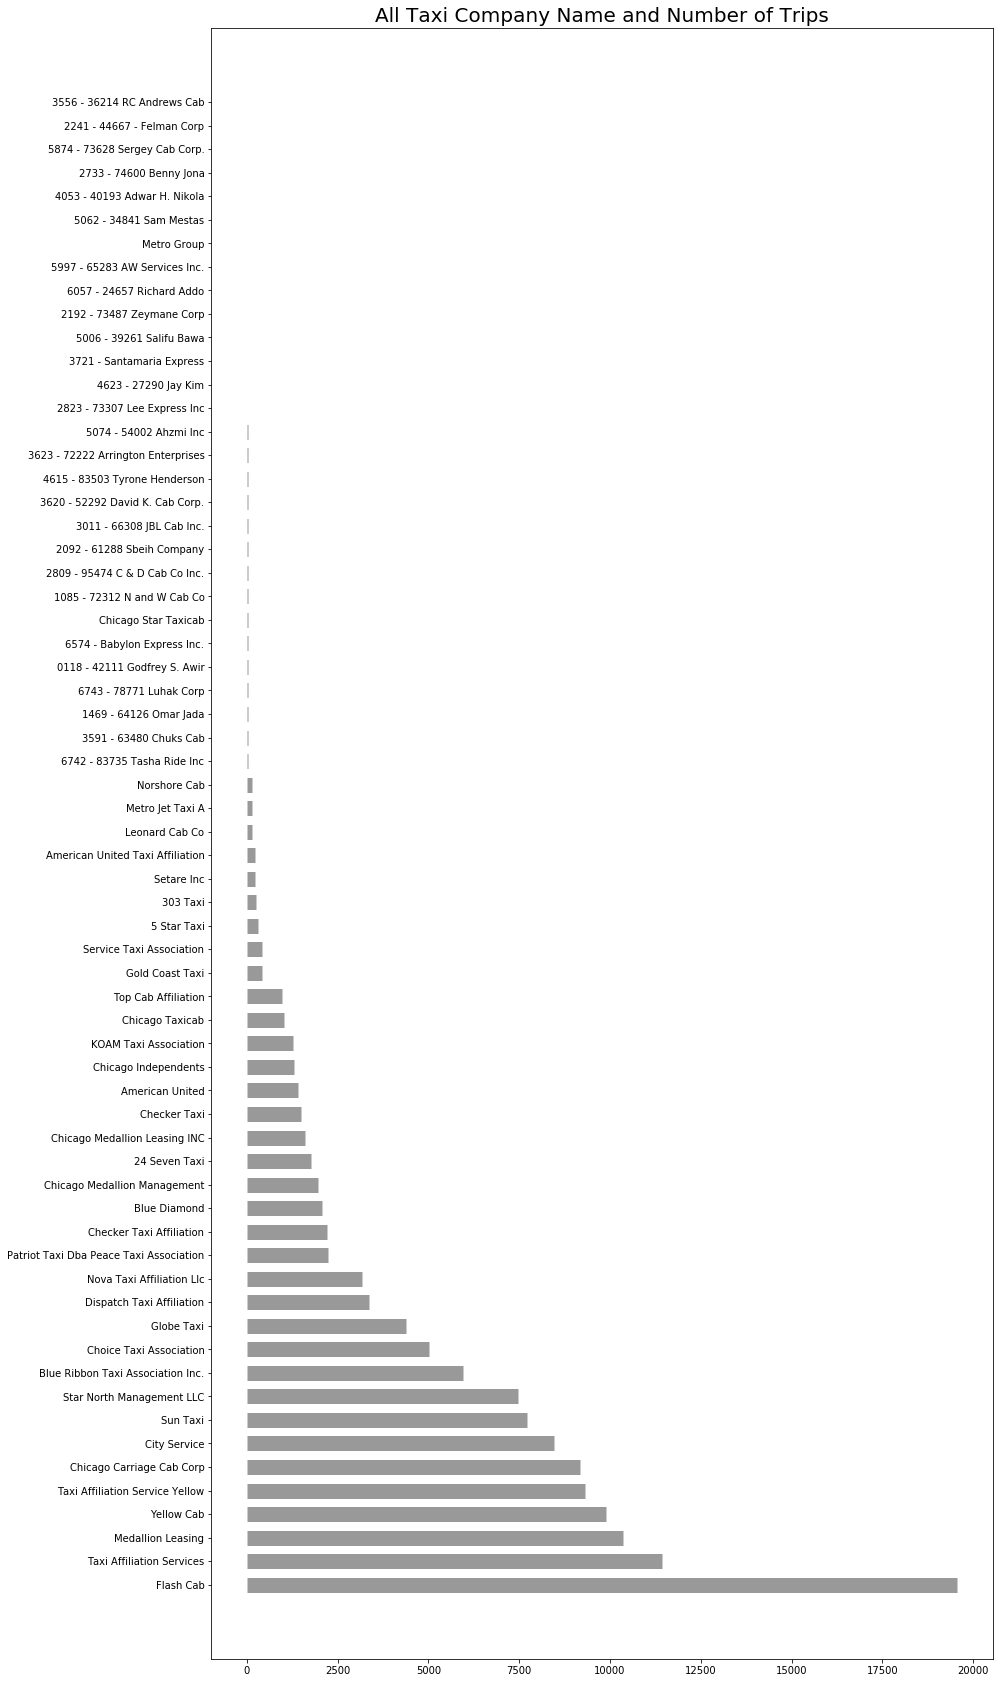

In [9]:
fig, ax = plt.subplots(figsize=(14, 30))
ax.set_title('All Taxi Company Name and Number of Trips', size=20)
plt.hlines(y=trips_by_company.company_name, xmin=0, xmax=trips_by_company.trips_amount,  alpha=0.4, linewidth=15)

### Conclusion

This graph shows all company names. There are 64 rows in the table. To make the data easier to understand, the top 30 companies were selected.

In [10]:
new_trip_co = trips_by_company.iloc[30::-1] #to get the most relevant rows and have largest at the top
#new_trip_co

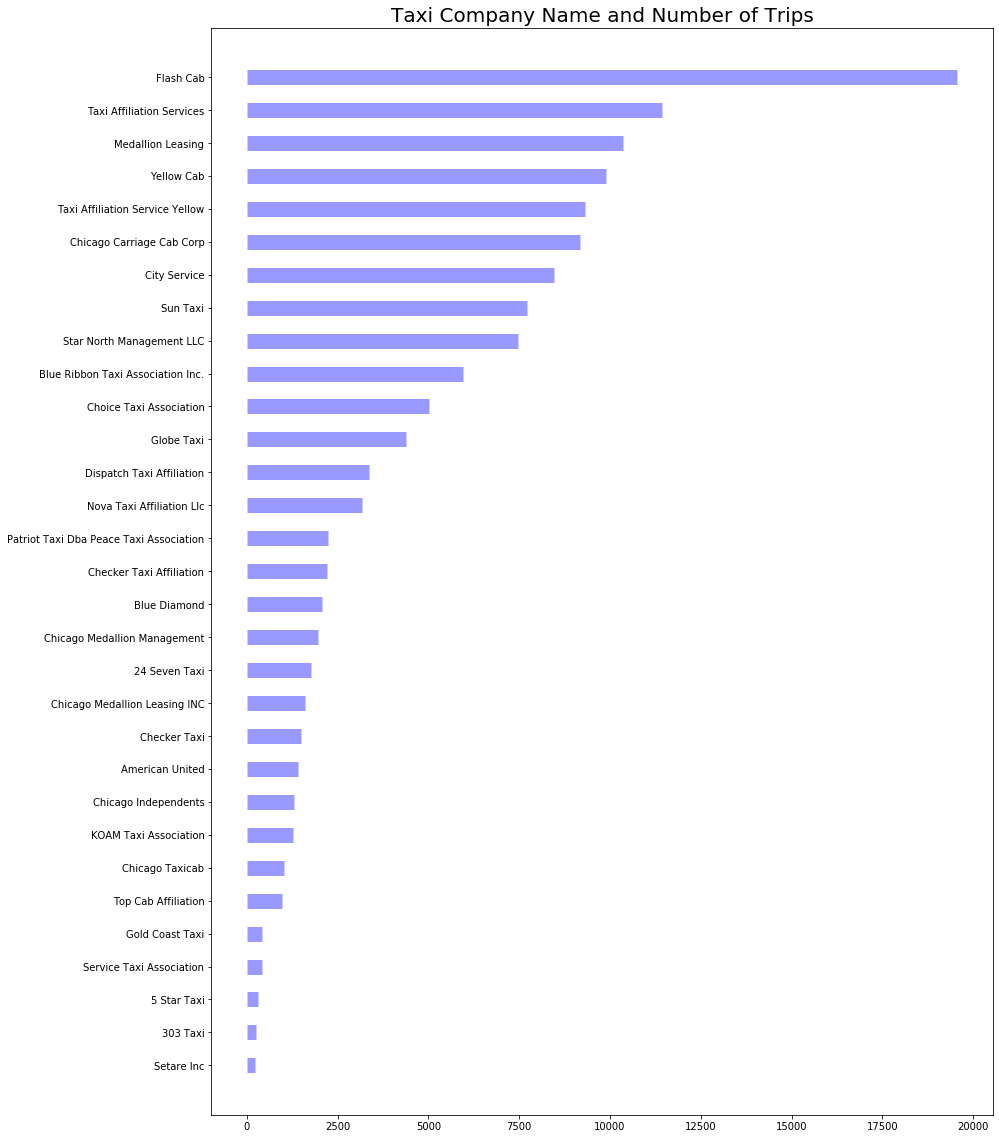

In [11]:
fig, ax = plt.subplots(figsize=(14, 20))
ax.set_title('Taxi Company Name and Number of Trips', size=20)
plt.hlines(y=new_trip_co.company_name, xmin=0, xmax=new_trip_co.trips_amount, color='b', alpha=0.4, linewidth=15)

### Conclusion

Flashcab has almost double the trips of the next 3 largest competitors. Looking online, we discover that Flashcab has been a technology innovator and leader in the Chicago area since 1945. "FLASH, as it continues today, was always eager to integrate new, top of the line technology, consistently offering Chicago a better taxi dispatch service."
https://flashcab.com/about-us/
    
https://www.chicago.gov/city/en/depts/bacp/supp_info/medallion_owner_information.html

https://yellowcabchicago.com/

It is difficult to clarify exactly what company "taxi affiliation services" is. This is a question that would need to be brought up if we needed to directly compare the top taxi companies.

### top 10 neighborhoods by number of dropoffs

In [12]:
new_dropoff = dropoff_avg.iloc[9::-1] # to get top 10 and have largest on top
#new_dropoff

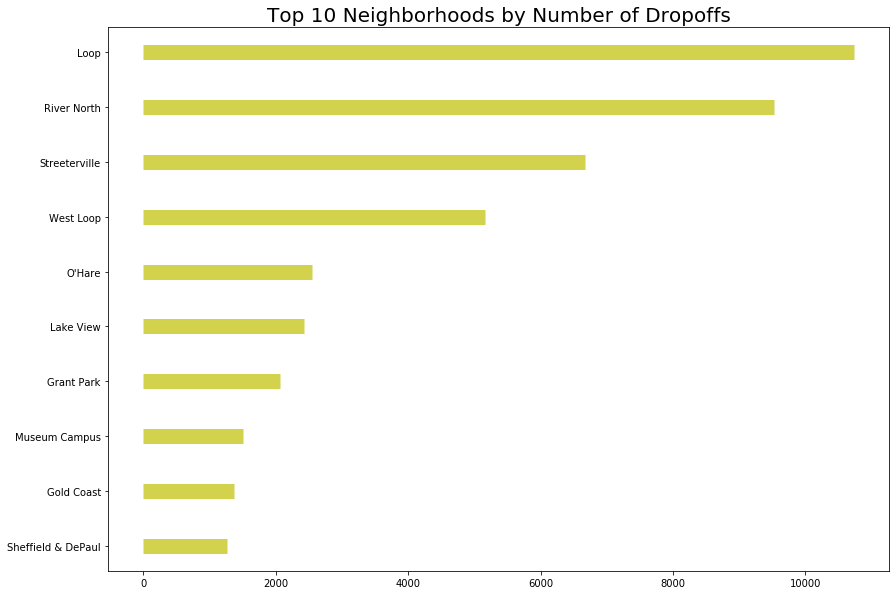

In [13]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_title('Top 10 Neighborhoods by Number of Dropoffs', size=20)
plt.hlines(y=new_dropoff.dropoff_location_name, xmin=0, xmax=new_dropoff.average_trips, 
           color='y', alpha=0.7, linewidth=15)

### Conclusion

Research online gives clear reasons behind the top dropoff locations. 

The Loop is the heart of downtown Chicago, so this destination will be for business and government as well as and shopping and dining. River North is also a business destination as well as galleries, shopping and dining. 

Streeterville seems to be more for entertainment and less for business. West Loop appears to be primarily a dining destination.

Streeterville and West Loop combined roughly equal dropoffs for the Loop. River North is only 1,000 dropoffs behind the Loop.

Overall, business needs drive the taxi dropoffs.

#### Research and sources:

The Loop, one of Chicago's 77 designated community areas, is the central business district of the city and is the main section of Downtown Chicago.  
https://en.wikipedia.org/wiki/Chicago_Loop

River North is a dynamic and growing technology-driven neighborhood known for its fine dining, galleries, nightlife, and riverwalk amenities.
https://en.wikipedia.org/wiki/Near_North_Side,_Chicago#River_North

Streeterville is where you'll find Navy Pier, a family-friendly playland packed with amusement rides (including the 200-foot Centennial Wheel), gift shops and eateries, docks lined with sightseeing and cruise boats, sweeping lakefront views, summer fireworks displays, the Chicago Children's Museum.    
https://www.choosechicago.com/neighborhoods/streeterville/

This former industrial area turned historic warehouses into some of the city’s hottest restaurants. A former meat-packing district, the West Loop has become one of the most dynamic dining destinations in the city. In particular, a stretch of Randolph Street known as Restaurant Row is where you’ll find many of the neighborhood’s most celebrated spots.     
https://www.choosechicago.com/neighborhoods/west-loop/ 

### Step 5. Testing hypotheses (Python)

project_sql_result_07.csv — the result of the last query. It contains data on
rides from the Loop to O'Hare International Airport. Remember, these are the
table's field values:
start_ts - pickup date and time
weather_conditions - weather conditions at the moment the ride started
duration_seconds - ride duration in seconds
Test the hypothesis:
"The average duration of rides from Loop neighborhood to O'Hare
International Airport changes on rainy Saturdays."
Set the significance level (alpha) value independently.
Explain:
how you formed the null and alternative hypotheses
what criterion you used to test the hypotheses and why

In [14]:
ohare_weather = pd.read_csv("/datasets/project_sql_result_07.csv")
#ohare_weather

Ho Null Hypothesis: "The average duration of rides from Loop neighborhood to O'Hare
International Airport does not change/is the same on rainy Saturdays."

H1 Alternative Hypothesis: "The average duration of rides from Loop neighborhood to O'Hare
International Airport changes on rainy Saturdays."

In [15]:
rain = ohare_weather[ohare_weather['weather_conditions']=='Bad'].reset_index()
#rain

In [16]:
sun = ohare_weather[ohare_weather['weather_conditions']=='Good'].reset_index()
#sun

In [17]:
np.mean(rain['duration_seconds'])

2427.2055555555557

In [18]:
np.mean(sun['duration_seconds'])

1999.6756756756756

In [19]:
stats.ttest_ind(rain['duration_seconds'],
                sun['duration_seconds'])

Ttest_indResult(statistic=6.946177714041499, pvalue=6.517970327099473e-12)

In [20]:
alpha = .05 # critical statistical significance

results = stats.ttest_ind(rain['duration_seconds'],
                sun['duration_seconds'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


### Conclusion

We reject the null hypothesis. We would expect the duration of rides to be longer bad weather for a number of reasons. More people will drive their car instead of choosing mass transit. More vehicles on the road. Bad weather also creates hazardous driving conditions and people drive more slowly, making the duration of the trip longer. 

### Overall Conclusion

Business creates the need for taxi trips more than entertainment. Flash Cab is the most popular by almost double. If you need a taxi in bad weather, allow extra time.